In [67]:
import pandas as pd
import numpy as np
from pandas import DataFrame

#For plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import norm
sns.set()

In [32]:
bookings = pd.read_csv('SIS_bookings.csv')

In [33]:
bookings

,Unnamed: 0,0,1,2,3
0,0,Day,Facility,Booking Time,Purpose
1,1,"8 February 2020, Saturday",SIS Class Rm B1-1,08:30-12:30,Student
2,2,"8 February 2020, Saturday",SIS GSR 2-1,13:00-17:00,Student
3,3,"8 February 2020, Saturday",SIS GSR 2-5,10:00-14:00,Student
4,4,"8 February 2020, Saturday",SIS GSR 2-6,13:00-17:00,Student
...,...,...,...,...,...
801,801,"27 January 2020, Monday",SIS GSR 3-6,12:00-15:30,Timetabling & Course Enrolment
802,802,"27 January 2020, Monday",SIS GSR 3-6,19:00-22:30,Student
803,803,"26 January 2020, Sunday",SIS GSR 3-5,14:30-17:00,Student
804,804,"25 January 2020, Saturday",SIS GSR 3-6,13:30-17:00,Faculty


In [34]:
bookings['2']

0      Booking Time
1       08:30-12:30
2       13:00-17:00
3       10:00-14:00
4       13:00-17:00
           ...     
801     12:00-15:30
802     19:00-22:30
803     14:30-17:00
804     13:30-17:00
805     13:30-17:00
Name: 2, Length: 806, dtype: object

In [35]:
bookings.count()

Unnamed: 0    806
0             806
1             806
2             806
3             806
dtype: int64

In [36]:
bookings = bookings.rename(columns={'0' : 'Day', '1': 'Facility', '2':'Booking Time', '3': 'Purpose'})

In [37]:
bookings = bookings.drop(columns='Unnamed: 0')

In [40]:
bookings = bookings.drop(bookings.index[0])

In [41]:
bookings

,Day,Facility,Booking Time,Purpose
1,"8 February 2020, Saturday",SIS Class Rm B1-1,08:30-12:30,Student
2,"8 February 2020, Saturday",SIS GSR 2-1,13:00-17:00,Student
3,"8 February 2020, Saturday",SIS GSR 2-5,10:00-14:00,Student
4,"8 February 2020, Saturday",SIS GSR 2-6,13:00-17:00,Student
5,"8 February 2020, Saturday",SIS GSR 3-1,10:30-14:30,Student
...,...,...,...,...
801,"27 January 2020, Monday",SIS GSR 3-6,12:00-15:30,Timetabling & Course Enrolment
802,"27 January 2020, Monday",SIS GSR 3-6,19:00-22:30,Student
803,"26 January 2020, Sunday",SIS GSR 3-5,14:30-17:00,Student
804,"25 January 2020, Saturday",SIS GSR 3-6,13:30-17:00,Faculty


In [57]:
bookings[bookings['Purpose'] =='Student'].count()

Day             487
Facility        487
Booking Time    487
Purpose         487
dtype: int64

In [58]:
bookings['Facility'].unique()

array(['SIS Class Rm B1-1', 'SIS GSR 2-1', 'SIS GSR 2-5', 'SIS GSR 2-6',
       'SIS GSR 3-1', 'SIS GSR 3-2', 'SIS GSR 3-3', 'SIS GSR 3-5',
       'SIS GSR 3-6', 'SIS Seminar Rm B1-1', 'SIS Seminar Room 2-1',
       'SIS Seminar Room 2-2', 'SIS Seminar Room 2-3',
       'SIS Seminar Room 2-4', 'SIS Seminar Room 3-3', 'SIS GSR 2-2',
       'SIS GSR 2-3', 'SIS GSR 2-4', 'SIS GSR 2-7', 'SIS GSR 3-4',
       'SIS Seminar Room 3-1', 'SIS Seminar Room 3-2',
       'SIS Seminar Room 3-4'], dtype=object)

In [59]:
bookings['Purpose'].unique()

array(['Student', 'Faculty', 'SIS PG by Course Work',
       'Institute of Innovation and Entrepreneurship',
       'Office of the Dean', 'Learning Space Technology Services',
       'Creative Experience and Partnerships Team', 'SIS Instructors',
       'Timetabling & Course Enrolment', 'Conference',
       'Living Analytics Research Centre',
       'School of Information Systems',
       'SIS Research Centre (Extenal Funded)', 'SMU Academy',
       'Office of Safety & Security', 'Student Leadership',
       'International Student Exchange Programme (Inbound/Outbound) and Short term Study Programme'],
      dtype=object)

In [60]:
bookings['Booking Time'].unique()

array(['08:30-12:30', '13:00-17:00', '10:00-14:00', '10:30-14:30',
       '09:00-13:00', '15:30-17:00', '08:00-09:00', '09:00-09:30',
       '09:30-10:00', '10:00-10:30', '10:30-11:00', '11:00-11:30',
       '11:30-12:00', '13:30-17:00', '09:00-12:30', '08:30-14:00',
       '08:00-17:00', '08:00-13:45', '14:00-19:30', '19:30-22:30',
       '14:00-17:00', '17:00-20:00', '09:00-12:00', '12:00-13:00',
       '18:00-21:30', '10:30-11:30', '12:30-13:30', '14:00-15:00',
       '15:30-16:30', '16:30-18:00', '11:30-15:30', '15:30-19:30',
       '11:00-14:00', '12:30-16:30', '16:30-18:30', '12:00-16:00',
       '16:00-20:00', '09:30-12:00', '12:00-15:30', '19:30-22:00',
       '10:00-12:00', '16:00-19:00', '13:00-16:00', '08:00-11:30',
       '15:30-18:45', '19:00-22:30', '15:30-18:30', '12:00-15:15',
       '12:00-15:45', '16:00-18:45', '15:30-22:30', '11:30-13:45',
       '14:00-19:00', '09:30-18:30', '19:00-22:00', '08:30-12:00',
       '08:30-11:30', '15:30-19:00', '11:00-12:00', '11:30-14:

In [65]:
bookings_time = bookings.groupby('Booking Time').size()
bookings_time

Booking Time
00:00-10:30     1
08:00-09:00     1
08:00-11:30    81
08:00-11:45     2
08:00-13:45     2
               ..
20:00-22:00     1
20:00-22:30     3
20:30-22:30     2
21:30-00:00     1
22:00-22:30     1
Length: 127, dtype: int64

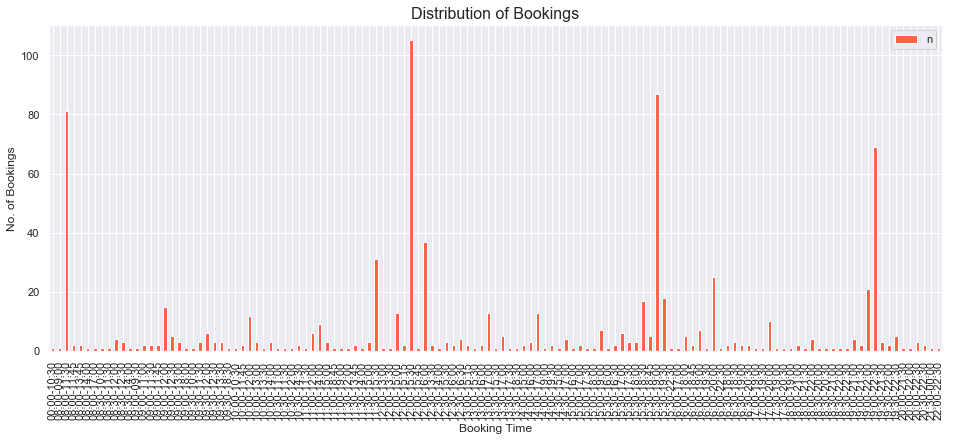

In [76]:
bookings_time = bookings.groupby('Booking Time').size().reset_index(name='n')

fig, ax = plt.subplots()
bookings_time.plot(kind='bar', x='Booking Time', y='n', ax=ax, figsize=(16, 6), color='tomato',)
ax.set_ylabel("No. of Bookings")
ax.set_xlabel("Booking Time")
plt.title("Distribution of Bookings", fontsize=16)
plt.show()

In [92]:
def filter_(x):
    if '15:30' in x:
        r = 1
    else:
        r = 0
    return r

In [93]:
bookings['15:30'] = bookings['Booking Time'].apply(filter_)

In [94]:
bookings['15:30'].value_counts()

0    521
1    284
Name: 15:30, dtype: int64

In [100]:
bookings

,Day,Facility,Booking Time,Purpose,15:30
1,"8 February 2020, Saturday",SIS Class Rm B1-1,08:30-12:30,Student,0
2,"8 February 2020, Saturday",SIS GSR 2-1,13:00-17:00,Student,0
3,"8 February 2020, Saturday",SIS GSR 2-5,10:00-14:00,Student,0
4,"8 February 2020, Saturday",SIS GSR 2-6,13:00-17:00,Student,0
5,"8 February 2020, Saturday",SIS GSR 3-1,10:30-14:30,Student,0
...,...,...,...,...,...
801,"27 January 2020, Monday",SIS GSR 3-6,12:00-15:30,Timetabling & Course Enrolment,1
802,"27 January 2020, Monday",SIS GSR 3-6,19:00-22:30,Student,0
803,"26 January 2020, Sunday",SIS GSR 3-5,14:30-17:00,Student,0
804,"25 January 2020, Saturday",SIS GSR 3-6,13:30-17:00,Faculty,0


In [102]:
bookings['Purpose'].value_counts()

Student                                                                                       487
Faculty                                                                                       209
SIS PG by Course Work                                                                          31
Timetabling & Course Enrolment                                                                 23
Learning Space Technology Services                                                             12
School of Information Systems                                                                  10
Office of the Dean                                                                              9
SIS Instructors                                                                                 7
SMU Academy                                                                                     3
Student Leadership                                                                              2
Living Analytics Res